**Importing Libraries**

In [0]:
%matplotlib inline
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

**Gathering and loading data**

In [0]:
traindata=datasets.MNIST('/data',train=True, download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(traindata,batch_size=64,shuffle=True)

testdata=datasets.MNIST('/data',train=False, download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=True)

**Visualizing data**

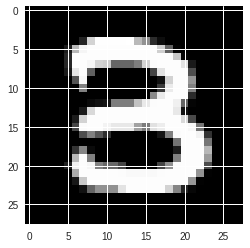

In [3]:
images,_=next(iter(trainloader))
plt.imshow(images[0].reshape(28,28),cmap='gray')

**Model**

In [4]:
class ConvAutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
   
    #Encoder  
    self.conv1=nn.Conv2d(1,16,3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(16,4,3,padding=1)
    
    #Decoder
    self.trans_conv1=nn.ConvTranspose2d(4,16,2,stride=2)
    self.trans_conv2=nn.ConvTranspose2d(16,1,2,stride=2)
    
  def forward(self,x):
    x=self.pool(self.conv1(x))
    x=self.pool(self.conv2(x))
    
    x=self.trans_conv1(x)
    x=self.trans_conv2(x)
    
    return x
ConvAutoEncoder()   

ConvAutoEncoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (trans_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)

**Training Objects**

In [0]:
model=ConvAutoEncoder()
model.cuda()
criteria=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

**Training**

In [6]:
epoch=15
for e in range(epoch):
    running_loss=0
    for images,_ in trainloader:
        images=images.cuda()
        optimizer.zero_grad()
    
#         images=images.view(images.size(0),-1)
      
#         print(images.shape)
        logits=model.forward(images)

    
        loss=criteria(logits,images)
        loss.backward()
    
        optimizer.step()
    
        running_loss+=loss.item()
    
    else:
        print('Training Loss : ',running_loss/len(trainloader))

Training Loss :  0.02332700484358807
Training Loss :  0.017081440517754315
Training Loss :  0.016758013336953006
Training Loss :  0.016574283531590947
Training Loss :  0.01645210534155464
Training Loss :  0.016314499608393925
Training Loss :  0.016184120466793652
Training Loss :  0.01611490308074777
Training Loss :  0.016069671070612253
Training Loss :  0.01604057639352739
Training Loss :  0.016024801443253498
Training Loss :  0.016007716945215647
Training Loss :  0.0160003009178777
Training Loss :  0.01598796143885583
Training Loss :  0.015979089564693443


**Before Compression**

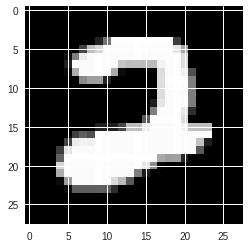

In [7]:
images,_=next(iter(testloader))
plt.imshow(images[0].reshape(28,28),cmap='gray')

**After Compression**

In [0]:
with torch.no_grad():
#     images=images.view(-1,784)
    images=images.cuda()
    comp_img=model.forward(images)
 

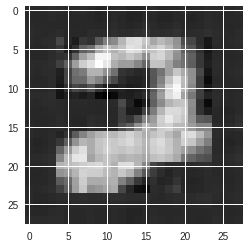

In [9]:
comp_img=comp_img.cpu()
plt.imshow(comp_img[0].reshape(28,28),cmap='gray')